# Important Details  

  
  Worked on 11/16/21 morning  
  Code from: https://realpython.com/python-nltk-sentiment-analysis/

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
X_train = pd.read_csv('../../data/X_train',index_col= 0)
y_train = pd.read_csv('../../data/y_train', index_col =0)

In [70]:
X_train.shape, y_train.shape

((6365, 1), (6365, 1))

In [3]:
X_test = pd.read_csv('../../data/X_test', index_col = 0)

In [4]:
X_test['cleaned_tweets'].iloc[0]

"['friends', 'coming', 'austin', 'sxsw', 'link']"

In [5]:
type(X_test['cleaned_tweets'].iloc[0])

str

In [6]:
import ast

X_test['cleaned_tweets'] =[ast.literal_eval(x) for x in X_test['cleaned_tweets'] ]

In [7]:
type(X_test['cleaned_tweets'].iloc[0])

list

In [8]:
X_test

,cleaned_tweets
7678,"[friends, coming, austin, sxsw, link]"
4019,"[survival, kit, provided, folks, line, store, ..."
3772,"[rt, ûï, launch, major, new, social, network, ..."
7465,"[attended, preso, living, simply, felt, bit, g..."
8220,"[deviantart, buys, ipad, austin, tests, muro, ..."
...,...
5734,"[rt, many, asked, last, night, free, phone, si..."
5191,"[rt, quot, quot, refrigerator, magnet, game, q..."
5390,"[rt, developers, friends, let, hang, 12, 30p, ..."
860,"[geeky, love, rt, opening, temporary, store, d..."


In [9]:
y_train.value_counts()

emotion
1          3792
2          2063
0           397
3           113
dtype: int64

In [10]:
y_train.head()

,emotion
2954,3
2709,2
2357,2
6195,2
1366,2


### Reducing Y_train to binary 

In [11]:
def to_binary(x):
    if x == 1 or x == 2:
        x = 1
    else:
        x = 0
    
    return x

In [12]:
y_train['emotion'] = y_train['emotion'].map(lambda x: to_binary(x))

In [13]:
y_train.value_counts()

emotion
1          5855
0           510
dtype: int64

### Remove Nulls

In [71]:
X_train.shape, y_train_multi_class.shape

((6365, 1), (6365, 1))

In [75]:
X_train[X_train.isna().any(axis=1)]


,cleaned_tweets
6,NaN
7346,NaN


In [87]:
new_y_train_multi = y_train_multi_class.drop(index=[6,7346])


In [88]:
X_train.isna().sum()

cleaned_tweets    0
dtype: int64

In [78]:
X_train.dropna(inplace= True)

In [79]:
X_train.isna().sum()

cleaned_tweets    0
dtype: int64

In [89]:
X_train.shape, new_y_train_multi.shape

((6363, 1), (6363, 1))

In [14]:
from nltk import word_tokenize

## Redoing the above with types of sentiment (pos/neg/neutral)  
- neutral combines "no sentiment" and "I don't know" categories

In [15]:
y_train_multi_class = pd.read_csv('../../data/y_train', index_col =0)

In [16]:
y_train_multi_class.value_counts()

emotion
1          3792
2          2063
0           397
3           113
dtype: int64

**Emotion Categorical Encoding Key:**

0. Negative, "Negative emotion" 
1. None, "No emotion toward brand or product"
2. Positive, "Positive emotion"
3. Unsure, "I can't tell"

In [17]:
def remove_unsure(score):
    if score == 3:
        return 1
    else: 
        return score

In [18]:
y_train_multi_class['emotion'] = y_train_multi_class['emotion'].apply(lambda x: remove_unsure(x))

In [246]:
y_train_multi_class.value_counts(normalize=True)

emotion
1          0.613511
2          0.324116
0          0.062372
dtype: float64

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [82]:
tfidf_vec = TfidfVectorizer()

In [83]:
X = tfidf_vec.fit_transform(X_train['cleaned_tweets'])

In [84]:
X

<6363x7243 sparse matrix of type '<class 'numpy.float64'>'
	with 56954 stored elements in Compressed Sparse Row format>

In [85]:
tfidf_train_df = pd.DataFrame(X.toarray(), 
                              columns=tfidf_vec.get_feature_names(), 
                              index=X_train.index)

In [86]:
tfidf_train_df

,00,000,00am,02,03,06,08,10,100,100s,...,ûïwin,ûò,ûòand,ûó,ûócan,ûólewis,ûólots,ûómy,ûóthe,ü_
2954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
type(tfidf_train_df)

pandas.core.frame.DataFrame

In [32]:
import nltk

In [33]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [34]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [94]:
from sklearn.metrics import plot_confusion_matrix

# X/y TEST

In [98]:
X_test = pd.read_csv('../../data/X_test', index_col = 0)
y_test = pd.read_csv('../../data/y_test', index_col = 0)

In [100]:
y_test['emotion'] = y_test['emotion'].apply(lambda x: remove_unsure(x))

In [101]:
y_test['emotion'].value_counts()

1    4430
2    2389
0     455
Name: emotion, dtype: int64

In [102]:
tfidf_test = tfidf_vec.transform(X_test['cleaned_tweets'])

In [106]:
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), 
                              columns=tfidf_vec.get_feature_names(), 
                              index=X_test.index)

In [107]:
tfidf_test_df

,00,000,00am,02,03,06,08,10,100,100s,...,ûïwin,ûò,ûòand,ûó,ûócan,ûólewis,ûólots,ûómy,ûóthe,ü_
7678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
y_test

,emotion
7678,1
4019,2
3772,1
7465,0
8220,2
...,...
5734,1
5191,2
5390,2
860,2


In [93]:
for name, sklearn_classifier in classifiers.items():
     classifier = sklearn_classifier
     classifier.fit_transform(tfidf_train_df, new_y_train_multi)
     accuracy = classifier.score(tfidf_train_df, new_y_train_multi)
     print(F"{accuracy:.2%} - {name}")
     
     plot_confusion_matrix(classifier, X)

C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


80.04% - BernoulliNB


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


82.18% - ComplementNB


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


75.66% - MultinomialNB


<ipython-input-93-cac45270fce5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(tfidf_train_df, new_y_train_multi)


74.48% - KNeighborsClassifier
99.04% - DecisionTreeClassifier


<ipython-input-93-cac45270fce5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(tfidf_train_df, new_y_train_multi)


99.03% - RandomForestClassifier


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


81.28% - LogisticRegression


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


98.71% - MLPClassifier


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


65.11% - AdaBoostClassifier


### putting test through models

C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 80.04% - BernoulliNB
Train score: 78.17% - BernoulliNB


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 82.18% - ComplementNB
Train score: 80.02% - ComplementNB


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 75.66% - MultinomialNB
Train score: 74.35% - MultinomialNB


<ipython-input-113-5cb1589823d8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(tfidf_train_df, new_y_train_multi)


Train score: 74.48% - KNeighborsClassifier
Train score: 73.14% - KNeighborsClassifier
Train score: 99.04% - DecisionTreeClassifier
Train score: 94.42% - DecisionTreeClassifier


<ipython-input-113-5cb1589823d8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(tfidf_train_df, new_y_train_multi)


Train score: 99.04% - RandomForestClassifier
Train score: 95.08% - RandomForestClassifier


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 81.28% - LogisticRegression
Train score: 79.58% - LogisticRegression


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 98.77% - MLPClassifier
Train score: 94.51% - MLPClassifier


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score: 65.11% - AdaBoostClassifier
Train score: 64.45% - AdaBoostClassifier


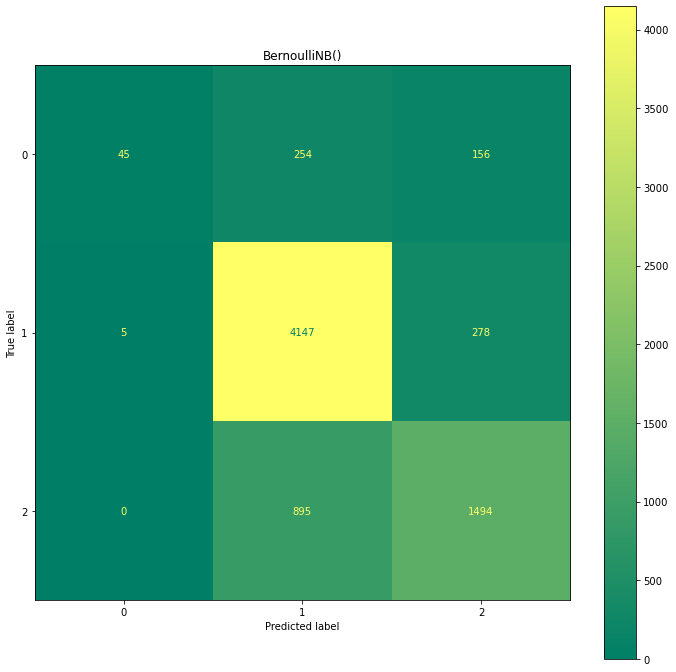

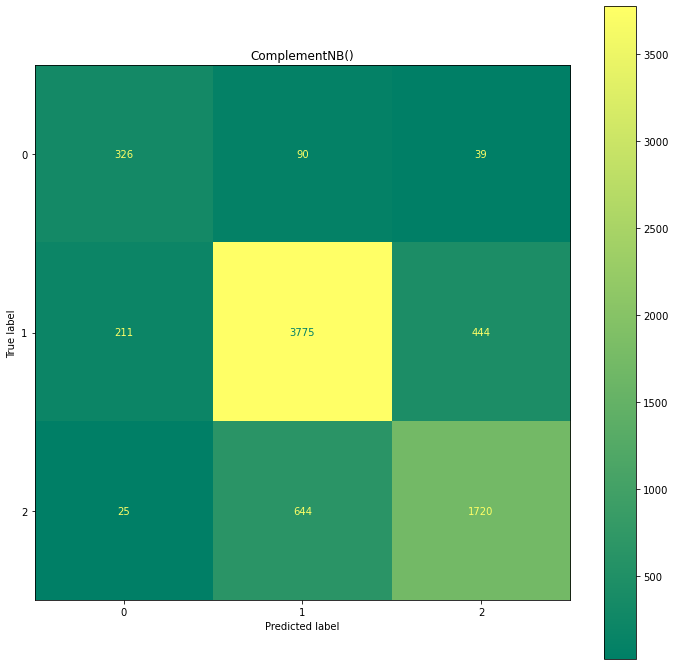

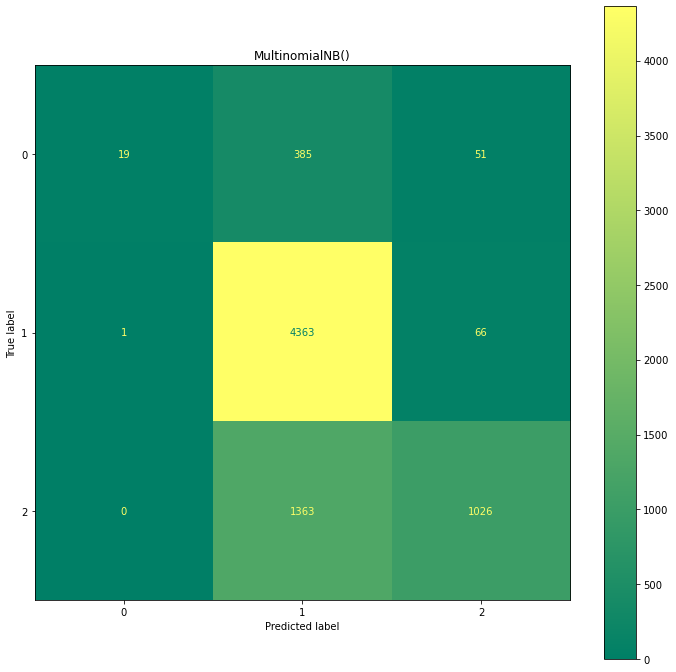

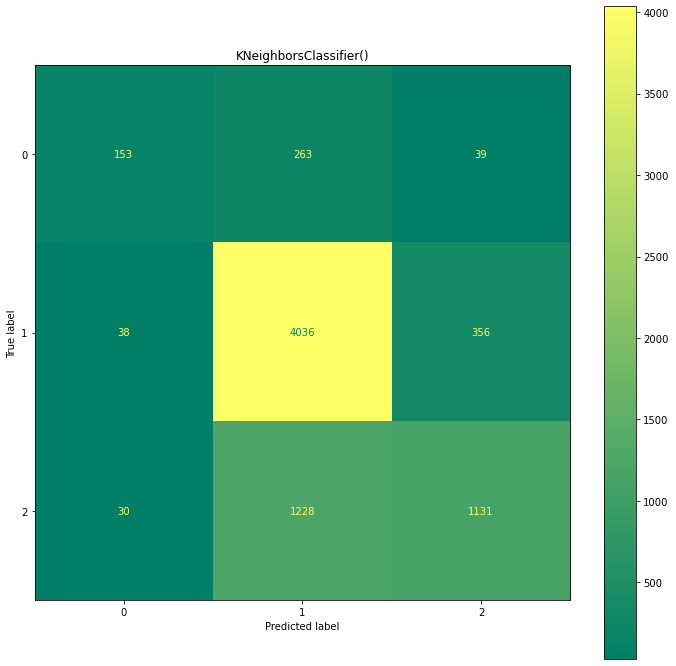

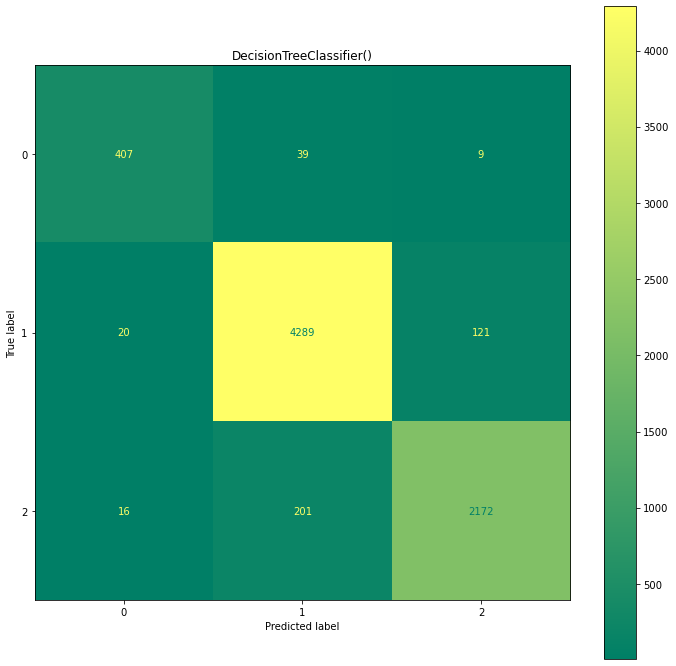

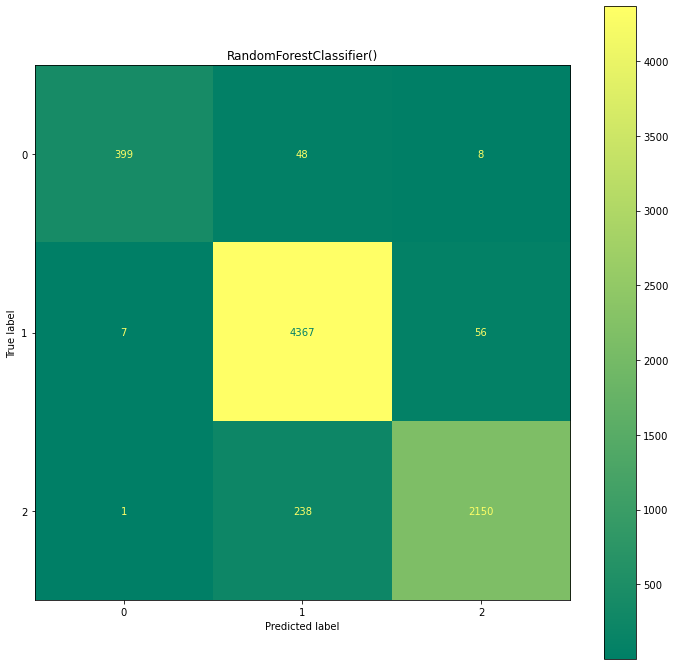

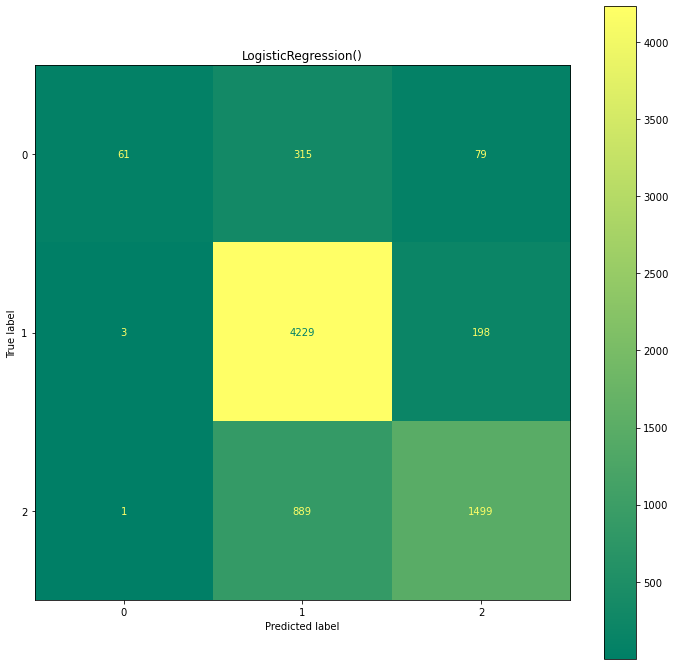

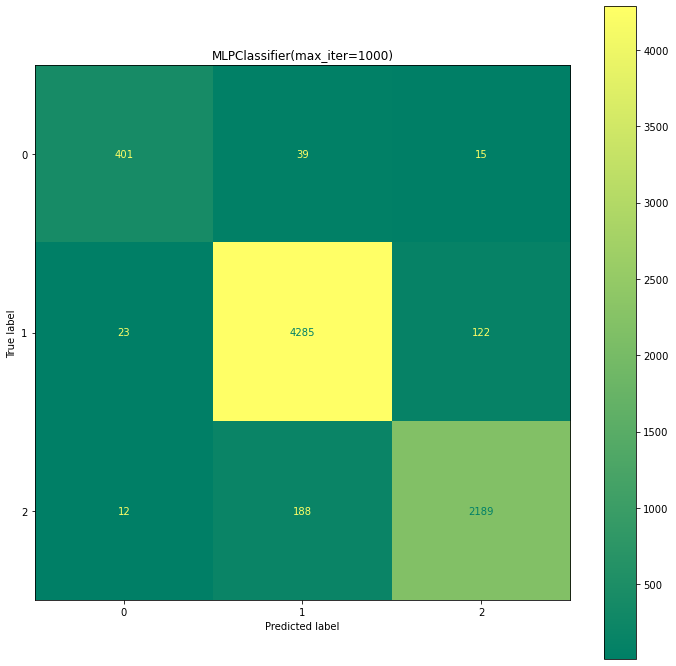

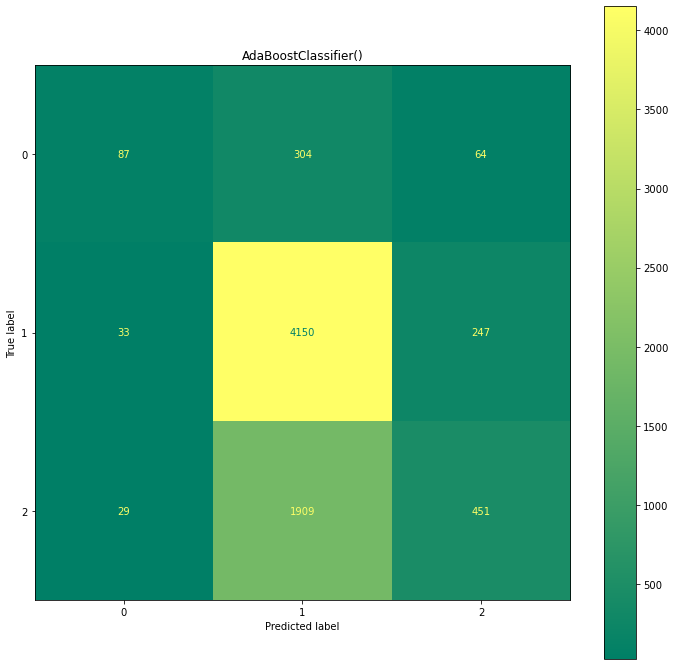

In [113]:
for name, sklearn_classifier in classifiers.items():
     classifier = sklearn_classifier
     classifier.fit(tfidf_train_df, new_y_train_multi)
     accuracy = classifier.score(tfidf_train_df, new_y_train_multi)
     print(F"Train score: {accuracy:.2%} - {name}")
     
     fig, ax = plt.subplots(figsize =(12,12))
     plot_confusion_matrix(classifier, tfidf_test_df, y_test, ax=ax, cmap='summer')
     ax.set_title(classifier); 
    
     accuracy = classifier.score(tfidf_test_df, y_test)
     print(F"Test score: {accuracy:.2%} - {name}")